In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
plt.style.use(['dark_background'])
from sklearn.metrics import pairwise_distances  # Don't use other functions in sklearn
%matplotlib inline


def train_kmeans(train_data, initial_centroids):
    ##### TODO: Implement here!! #####
    # Hint: pairwise_distances() might be useful
    N = train_data.shape[0]
    K = initial_centroids.shape[0]
    R = np.zeros((N,K))
    #err_history = []
    states = {
      'centroids': initial_centroids
    }
    ##### TODO: Implement here!! #####
    #N = 50
    #print(train_data.shape)
    k_idx = np.argmin(pairwise_distances(train_data, states['centroids']), axis = 1)
    for i in range(N):
        R[i, k_idx[i]] = 1

    for i in range(K):
        q = R[:,i].reshape(1,N)
        states['centroids'][i]=np.dot(q,train_data)/np.sum(q) 
    return states

def test_kmeans(states, test_data):
    result = {}
    ##### TODO: Implement here!! #####
    result = {
      'centroids': initial_centroids
    }
    N = test_data.shape[0]
    K = states['centroids'].shape[0]
    compressed_data = np.zeros_like(test_data) # TODO: modify here!
    centroids = states['centroids']
    for i in range(N):
        idx = np.argmin(pairwise_distances(test_data[i].reshape(1,-1), states['centroids']))
        compressed_data[i] = states['centroids'][idx]
    #dists_list = []
    
    #result['compressed'] = compressed_data
    ##### TODO: Implement here!! #####
    #result['pixel-error'] = calculate_error(test_data, compressed_data)
    result = {
        'compressed': compressed_data,
        'pixel-error': calculate_error(test_data, compressed_data)
    }
    return result

### DO NOT CHANGE ###
def calculate_error(data, compressed_data):
    assert data.shape == compressed_data.shape
    error = np.sqrt(np.mean(np.power(data - compressed_data, 2)))
    return error
### DO NOT CHANGE ###

# Load data
img_small = np.array(imageio.imread('q1data/mandrill-small.tiff')) # 128 x 128 x 3
img_large = np.array(imageio.imread('q1data/mandrill-large.tiff')) # 512 x 512 x 3

ndim = img_small.shape[-1]
train_data = img_small.reshape(-1, ndim).astype(float)
test_data = img_large.reshape(-1, ndim).astype(float)

# K-means
num_centroid = 16
initial_centroid_indices = [16041, 15086, 15419,  3018,  5894,  6755, 15296, 11460, 
                            10117, 11603, 11095,  6257, 16220, 10027, 11401, 13404]
initial_centroids = train_data[initial_centroid_indices, :]
states = train_kmeans(train_data, initial_centroids)
result_kmeans = test_kmeans(states, test_data)
print('Kmeans result=', result_kmeans)

Kmeans result= {'compressed': array([[155.45501956, 142.6714472 ,  78.28422425],
       [ 72.39616142,  70.93454724,  52.48179134],
       [ 72.39616142,  70.93454724,  52.48179134],
       ...,
       [ 72.39616142,  70.93454724,  52.48179134],
       [ 72.39616142,  70.93454724,  52.48179134],
       [ 72.39616142,  70.93454724,  52.48179134]]), 'pixel-error': 16.67936031119635}


Iteration No: 0 Error: 13.328692808059689
Iteration No: 1 Error: 13.1233066246321
Iteration No: 2 Error: 13.034582087480153
Iteration No: 3 Error: 12.983227794490372
Iteration No: 4 Error: 12.93367629070885
Iteration No: 5 Error: 12.875933115088028
Iteration No: 6 Error: 12.816562931736327
Iteration No: 7 Error: 12.767151109946882
Iteration No: 8 Error: 12.720603562593913
Iteration No: 9 Error: 12.68088966417506
Iteration No: 10 Error: 12.642245976071205
Iteration No: 11 Error: 12.599481943303926
Iteration No: 12 Error: 12.551401215661455
Iteration No: 13 Error: 12.511858789346679
Iteration No: 14 Error: 12.486356209991003
Iteration No: 15 Error: 12.466181265682264
Iteration No: 16 Error: 12.451005458969648
Iteration No: 17 Error: 12.441774514286925
Iteration No: 18 Error: 12.43661570515305
Iteration No: 19 Error: 12.431667221371725
Iteration No: 20 Error: 12.426945942833568
Iteration No: 21 Error: 12.424326446608193
Iteration No: 22 Error: 12.42184501662411
Iteration No: 23 Error: 12.

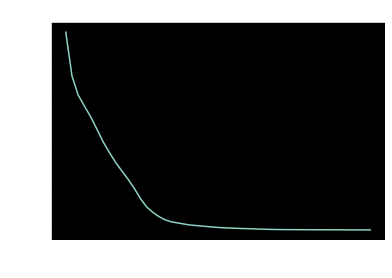

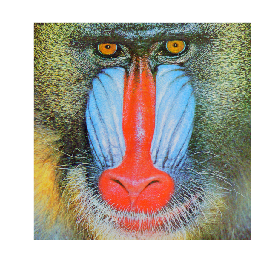

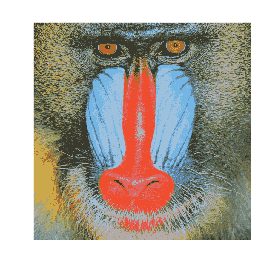

In [11]:
count = 0
error_hist = np.zeros((50,))
while(count < 50):
    states = train_kmeans(train_data, initial_centroids) 
    error_hist[count] = test_kmeans(states, train_data)['pixel-error']
    print("Iteration No:", count, "Error:", error_hist[count])
    count += 1
    
#test = test_kmeans(states,train_data)
plt.title("Pixel-Error vs Number of Iterations")
plt.xlabel("No of Iterations")
plt.ylabel("Pixel-Error")
plt.plot(np.arange(50), error_hist)


result_kmeans, compressed_img = test_kmeans(states, test_data)['pixel-error'], test_kmeans(states, test_data)['compressed']
print('\nKmeans result for test image=', result_kmeans)

plt.figure()
plt.title("The Original Large Image:")
plt.imshow(np.uint8(test_data.reshape(img_large.shape[0], img_large.shape[1],ndim)))

plt.figure()
plt.title("The Compressed Image:")
plt.imshow(np.uint8(compressed_img.reshape(img_large.shape[0], img_large.shape[1],ndim)))


GMM result =  {'compressed': array([[155.50220502, 153.45315315, 126.89736921],
       [ 80.79282549,  84.84501951,  66.83691198],
       [ 80.79282549,  84.84501951,  66.83691198],
       ...,
       [ 80.79282549,  84.84501951,  66.83691198],
       [ 80.79282549,  84.84501951,  66.83691198],
       [ 80.79282549,  84.84501951,  66.83691198]]), 'pixel-error': 24.876405977493082}
log likelihood for iteration  0  = [-15.29162207 -14.17615203 -13.51201635 ... -13.48381067 -13.44763444
 -13.76958281]
log likelihood for iteration  1  = [-15.74777758 -14.57639571 -13.46345767 ... -13.67569001 -13.54323269
 -13.81832161]
log likelihood for iteration  2  = [-15.8789495  -15.02217714 -13.58010416 ... -13.92640986 -13.72279959
 -13.95139275]
log likelihood for iteration  3  = [-15.92542657 -15.35292251 -13.7038703  ... -14.11954683 -13.86838791
 -14.05522761]
log likelihood for iteration  4  = [-16.01206554 -15.55080747 -13.78047331 ... -14.23391872 -13.96628882
 -14.14472167]
log likelihood f

C:\Users\Nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\Nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply


 11  = [-16.12374239 -15.87743356 -13.87099115 ... -14.40364165 -14.1755773
 -14.38946704]
log likelihood for iteration  12  = [-16.10445733 -15.90167001 -13.87999961 ... -14.42739229 -14.19923752
 -14.39893804]
log likelihood for iteration  13  = [-16.08287539 -15.92509503 -13.88951165 ... -14.45137083 -14.22250788
 -14.40605567]
log likelihood for iteration  14  = [-16.05964422 -15.94764552 -13.89945509 ... -14.47533689 -14.24529701
 -14.41128287]
log likelihood for iteration  15  = [-16.03526304 -15.96921138 -13.90976476 ... -14.49917907 -14.2675745
 -14.41495121]
log likelihood for iteration  16  = [-16.01013234 -15.98967262 -13.92038271 ... -14.52285237 -14.28933977
 -14.41730167]
log likelihood for iteration  17  = [-15.98458255 -16.00891864 -13.93125669 ... -14.54633882 -14.31060157
 -14.41851372]
log likelihood for iteration  18  = [-15.95889041 -16.02685761 -13.94233826 ... -14.56962533 -14.33136663
 -14.41872576]
log likelihood for iteration  19  = [-15.93328868 -16.04342059 

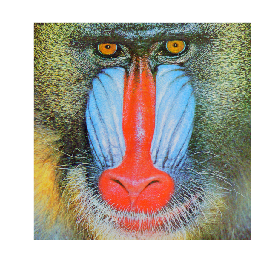

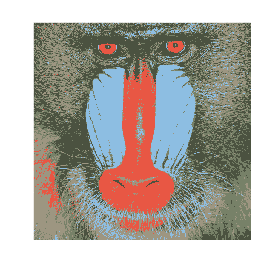

In [17]:
from scipy.stats import multivariate_normal  # Don't use other functions in scipy

def train_gmm(train_data, init_pi, init_mu, init_sigma):
  ##### TODO: Implement here!! #####
  # Hint: multivariate_normal() might be useful
  states = {
      'pi': init_pi,
      'mu': init_mu,
      'sigma': init_sigma,
  }
  K = init_pi.shape[0]
  N = train_data.shape[0]
  n_dist = np.zeros((N,K))
  gamma = np.zeros_like(n_dist)

  for i in range(K):
     n_dist[:,i] = multivariate_normal.pdf(train_data, mean = states['mu'][i], cov = states['sigma'][i])
  d = (np.dot(n_dist, states['pi'])).reshape((-1,))
  for k in range(K):
        gamma[:, k] = (states['pi'][k]*n_dist[:,k])/d
        nbr_k = np.sum(gamma[:, k])
        states['pi'][k] = nbr_k/N 
        states['mu'][k] = (1/nbr_k)*np.sum(np.multiply(train_data, gamma[:,k].reshape(-1,1)), axis=0)
        d_f = train_data-states['mu'][k].reshape(1,-1)
        prod_ = np.transpose(np.multiply(d_f, gamma[:, k].reshape(-1,1)))
        states['sigma'][k] = (1/nbr_k)*np.dot(prod_, d_f)
    
        count = 0
        for k in range(K):
            count = count + np.multiply(gamma[:,k], np.log(states['pi'][k]*n_dist[:,k]))
  ##### TODO: Implement here!! #####
  return states, count

def test_gmm(states, test_data):
  result = {}
  ##### TODO: Implement here!! #####
  #compressed_data = test_data


  N = test_data.shape[0]
  K = init_pi.shape[0]
  compressed_data = np.zeros_like(test_data) # TODO: modify here!

  for n in range(N):
        idx = np.argmin(pairwise_distances(test_data[n].reshape(1,-1), states['mu']))
        compressed_data[n] = states['mu'][idx]


  result = {
      'compressed': compressed_data,
      'pixel-error': calculate_error(test_data, compressed_data)
  }
  return result

# GMM
num_centroid = 5
init_pi = np.ones((num_centroid, 1)) / num_centroid
init_mu = initial_centroids[:num_centroid, :]
init_sigma = np.tile(np.identity(ndim), [num_centroid, 1, 1])*1000.

states, _ = train_gmm(train_data, init_pi, init_mu, init_sigma)
result_gmm = test_gmm(states, test_data)
print('GMM result = ', result_gmm)

count = 0
K = init_pi.shape[0]
while count <= 50:
    states, ct = train_gmm(train_data, init_pi, init_mu, init_sigma)

    print("log likelihood for iteration ", count," =", ct)
    count += 1

result_gmm, compressed = test_gmm(states, test_data)['pixel-error'], test_gmm(states, test_data)['compressed']
print('\nGMM result = ', result_gmm)
print("\nCovariance Matrix is", states['sigma'])
print("\nMean is ", states['mu'])
print("\npi is ", states['pi'])

plt.figure()
plt.title("The Original Large Image:")
plt.imshow(np.uint8(test_data.reshape(img_large.shape[0],img_large.shape[1],ndim)))


plt.figure()
plt.title("The Compressed Image:")
plt.imshow(np.uint8(compressed.reshape(img_large.shape[0],img_large.shape[1],ndim)))